# Neural networks on TensorFlow 2.0 

TensorFlow 2 makes it very easy for you to create neural networks because the library includes an overlay called Keras. Let's see how it works via MNIST. 

In [1]:
%%capture
!pip install s3fs

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.__version__

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


'2.4.1'

In [3]:
mnist = pd.read_csv('s3://full-stack-bigdata-datasets/Deep learning Images processing/Introduction aux réseaux de neurones/Exercices/src/train.csv')
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
n_samples = len(mnist)
n_samples

8816

In [5]:
# Separating pictures and labels
images = mnist.iloc[:, 1:].values
labels = mnist.iloc[:, :1].values

Nous allons avoir besoin de créer un objet [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) qui nous permet de manipuler des tenseurs de très large dimension et va surtout faciliter l'entrainement par la suite. 

Le plus simple est de créer un tuple de la forme suivante : `(X, target)`

In [11]:
# Create a tf dataset 
dataset = tf.data.Dataset.from_tensor_slices((images / 255, labels))
dataset

<TensorSliceDataset shapes: ((784,), (1,)), types: (tf.float64, tf.int64)>

In [12]:
train_size = int(0.8 * n_samples)
shuffle_dataset = dataset.shuffle(n_samples)
train_dataset = shuffle_dataset.take(train_size)
test_dataset = shuffle_dataset.skip(train_size)

This is a [1]


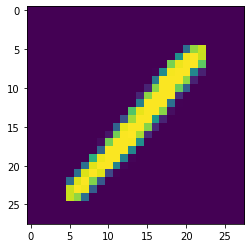

In [13]:
# Check one tensor
for image, label in train_dataset.take(1):
    print("This is a {}".format(label.numpy()))
    plt.imshow(tf.reshape(image, (28, 28)))

It is often recommended to create batches of images for training. Here is how we can do it.

In [14]:
# Create batchs
train_dataset = train_dataset.shuffle(train_size).batch(8)
test_dataset = test_dataset.shuffle(n_samples - train_size).batch(8)
train_dataset

<BatchDataset shapes: ((None, 784), (None, 1)), types: (tf.float64, tf.int64)>

In [16]:
# Exemple
for images, labels in train_dataset.take(1):
    print(images)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(8, 784), dtype=float64)


Let's move on to the model. This time we will create a neural network with: 

* An input layer 
* Two hidden layers 
* An output layer

For the input and hidden layers, we will use the [`relu`](https://www.tensorflow.org/api_docs/python/tf/nn/relu) activation function, which is more powerful than `sigmoid`.

NB: Relu ---> $f(x)=max(x, 0)$.

In [17]:
# Create a model 
model = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation="relu", input_shape=[784]),
            tf.keras.layers.Dense(16, activation="relu"),
            tf.keras.layers.Dense(8, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 25,793
Trainable params: 25,793
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784 * 32 + 32

25120

In [ ]:
32 * 16 + 16

528

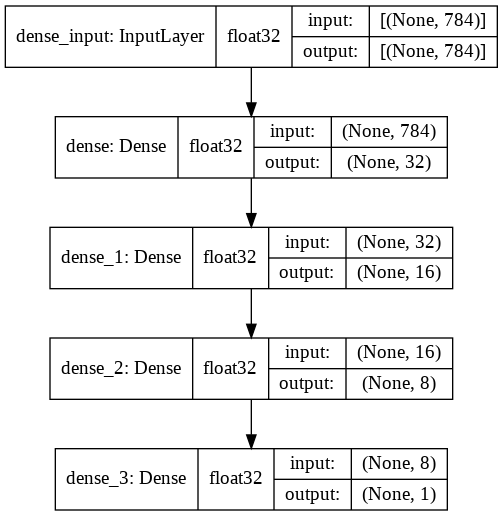

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

Once you have created your neural network architecture, you will need to create a [*compiler*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile). This object needs:
- an Optimizer (with a learning rate value) to update the parameters: we will use the `Adam` algorithm which is one of the best gradient descent evolution
- a loss function: we will use the `binary_crossentropy` for this classification
$$CE = -\frac{1}{N}\sum_i^N\sum_{j}^{C}y_{ji} \cdot log (s_{ij})$$
$$BCE = -\frac{1}{N}\sum_i^N y_{i0} \cdot log (s_{i0}) + y_{i1} \cdot log (s_{i1})$$
$$BCE = -\frac{1}{N}\sum_i^N (1 - y_{i1}) \cdot log (1 - s_{i0}) + y_{i1} \cdot log (s_{i1})$$
$$BCE = -\frac{1}{N}\sum_i^N log (s_{i1}) \text{ with } y_{i1} = 1$$
- a list of metrics (_OPTIONAL_)

In [19]:
# Compile your model 
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss=tf.losses.binary_crossentropy,
    metrics=['accuracy']
)

Let's get started on our model training.

In [20]:
# train your model 
history = model.fit(train_dataset, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 752ms/step - loss: 0.6862 - accuracy: 0.6250
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6494 - accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6185 - accuracy: 0.8750
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.5921 - accuracy: 0.8750
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.5667 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5426 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.5201 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4782 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 0.4536 - accuracy: 1.0000


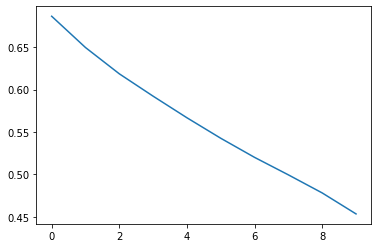

In [21]:
plt.plot(history.history["loss"], label="loss")
plt.show()

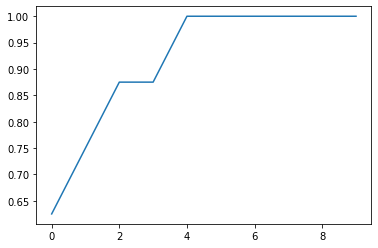

In [22]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.show()

In [23]:
# evaluate your model
model.evaluate(test_dataset)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:583: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: ignored

In [24]:
# test_dataset can be pass to Model.fit() to evaluate it on unseen data
# CAUTION: the parameters of the model are not reinitialzed if you don't re-create it
# to avoid an increasing amount of memory consuming: use tf.keras.backend.clear_session() before create the new model
history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 85ms/step - loss: 0.4245 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 43ms/step - loss: 0.3946 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 44ms/step - loss: 0.3657 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 40ms/step - loss: 0.3389 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 39ms/step - loss: 0.3129 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 40ms/step - loss: 0.2878 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 42ms/step - loss: 0.2643 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 42ms/step - loss: 0.2434 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 41ms/step - loss: 0.2229 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 40ms/step - loss: 0.2037 - accuracy: 1.0000


KeyError: ignored

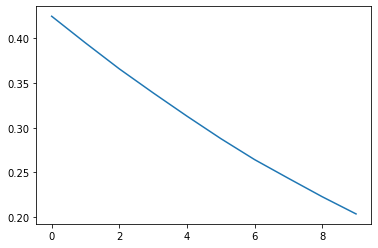

In [25]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("loss")
plt.legend()
plt.show()

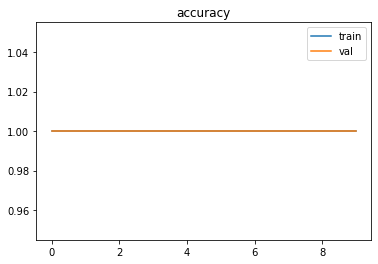

In [ ]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.title("accuracy")
plt.legend()
plt.show()

Let's look at some predictions! 

Prediction: [1.]


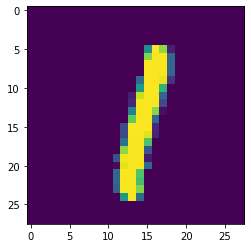

Prediction: [1.]


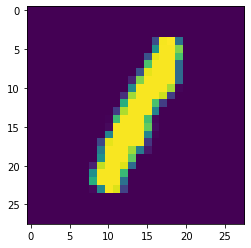

Prediction: [0.]


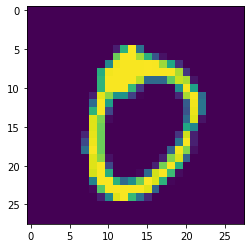

Prediction: [1.]


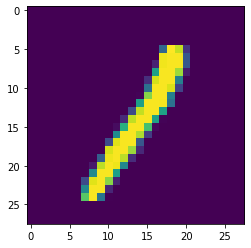

Prediction: [0.]


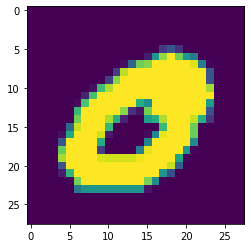

Prediction: [1.]


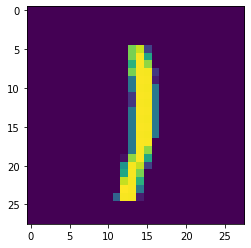

Prediction: [1.]


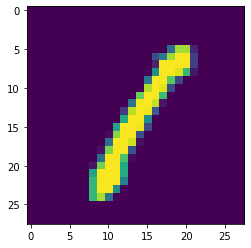

Prediction: [1.]


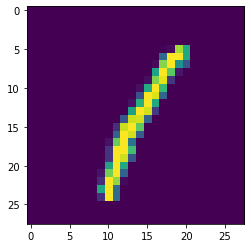

Prediction: [0.]


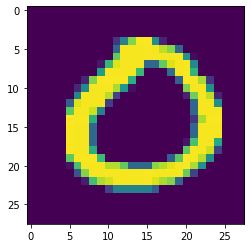

Prediction: [1.]


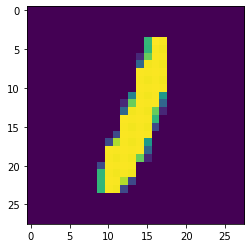

In [ ]:
# Make predictions 
for images, labels in test_dataset.take(10):
    print("Prediction: {}".format(model.predict(images)[0]))
    plt.imshow(images.numpy()[0].reshape(28,28))
    plt.show()
  

In [ ]:
first_layer_weights = model.layers[0].kernel
first_layer_weights

<tf.Variable 'dense/kernel:0' shape=(784, 32) dtype=float32, numpy=
array([[ 0.06128957, -0.02030358, -0.07464232, ..., -0.07812304,
         0.05316598, -0.07301144],
       [-0.03142204,  0.02158258,  0.03744221, ...,  0.07635362,
         0.04423619, -0.06053516],
       [ 0.01182952, -0.05567702,  0.02877676, ...,  0.07955482,
         0.05627409, -0.02562982],
       ...,
       [ 0.00329234, -0.05414234,  0.07214383, ...,  0.06280222,
         0.05602775, -0.05344523],
       [ 0.04871682,  0.05435892,  0.0034463 , ...,  0.0770924 ,
        -0.07351847,  0.08382625],
       [ 0.00402528,  0.06403186, -0.06037141, ...,  0.04274134,
         0.07453195,  0.00278099]], dtype=float32)>

In [ ]:
first_layer_bias = model.layers[0].bias
first_layer_bias

<tf.Variable 'dense/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.01214293, -0.00355211,  0.00523785, -0.01210611, -0.02448366,
        0.02162479, -0.01652069, -0.0223974 , -0.02808807, -0.01631823,
       -0.00491985,  0.02086092, -0.00493388, -0.01274551,  0.00533125,
        0.05757811, -0.02365016, -0.01619187, -0.00405096,  0.01751818,
       -0.01854448,  0.00160852, -0.01700452,  0.01369267, -0.0496325 ,
       -0.00970356, -0.00510227,  0.00287072,  0.02214536, -0.00398982,
       -0.04037457,  0.01455911], dtype=float32)>